In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data.dataloader import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

c:\Users\manch\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Convert mnist image files into a tensor of 4-Dimensions
transform = transforms.ToTensor()

In [5]:
# Model Class
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 12, 3, 1)
    self.conv2 = nn.Conv2d(12, 22, 3, 1)
    # Fully connected layer (torch.Size([1, 22, 5, 5])) here, 22*5*5 = 550
    self.fc1 = nn.Linear(550, 320)
    self.fc2 = nn.Linear(320, 160)
    self.fc3 = nn.Linear(160, 80)
    self.fc4 = nn.Linear(80, 40)
    self.fc5 = nn.Linear(40, 20)
    self.fc6 = nn.Linear(20, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)  # 2*2 kernal and stride length of 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)  # 2*2 kernal and stride length of 2

    # Re-View to flatten it out
    X = X.view(-1, 550)  # -1 so that we can vary the batch size

    # Fully Connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.relu(self.fc3(X))
    X = F.relu(self.fc4(X))
    X = F.relu(self.fc5(X))
    X = self.fc6(X)
    return F.log_softmax(X, dim=1)

In [6]:
model = Model()
model

Model(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 22, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=550, out_features=320, bias=True)
  (fc2): Linear(in_features=320, out_features=160, bias=True)
  (fc3): Linear(in_features=160, out_features=80, bias=True)
  (fc4): Linear(in_features=80, out_features=40, bias=True)
  (fc5): Linear(in_features=40, out_features=20, bias=True)
  (fc6): Linear(in_features=20, out_features=10, bias=True)
)

In [7]:
model.load_state_dict(torch.load('mnistmodel.pt'))

<All keys matched successfully>

In [8]:
model.eval()

Model(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 22, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=550, out_features=320, bias=True)
  (fc2): Linear(in_features=320, out_features=160, bias=True)
  (fc3): Linear(in_features=160, out_features=80, bias=True)
  (fc4): Linear(in_features=80, out_features=40, bias=True)
  (fc5): Linear(in_features=40, out_features=20, bias=True)
  (fc6): Linear(in_features=20, out_features=10, bias=True)
)

In [9]:
from PIL import Image

In [63]:
img = Image.open('real\img_3.png')
img = img.convert('L')
img_tensor = transform(img).unsqueeze(0)

In [64]:
img_tensor.shape

torch.Size([1, 1, 28, 28])

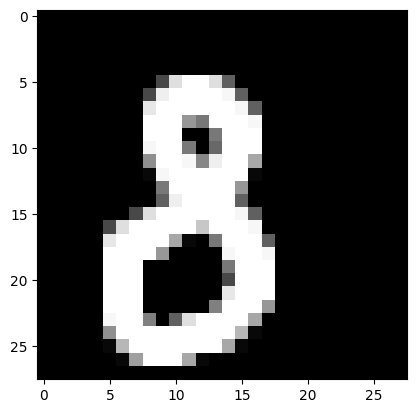

In [65]:
plt.imshow(img_tensor.squeeze().numpy(), cmap='gray')

In [66]:
prediction = torch.argmax(model(img_tensor))
print(f"Model predicted that the image is {prediction}")

Model predicted that the image is 8
